# One class SVM and NN

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


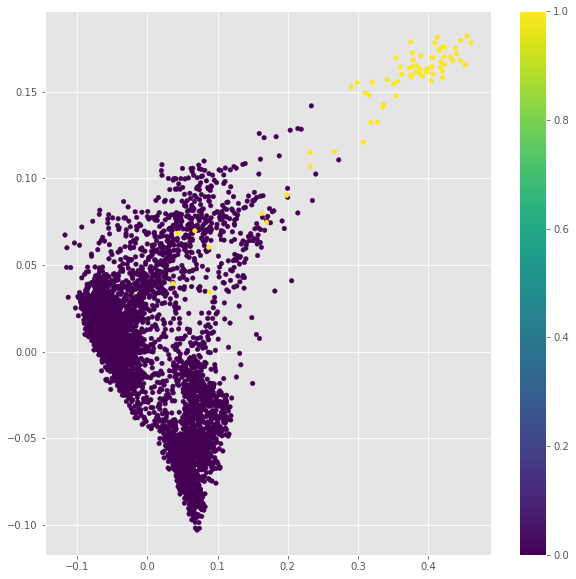

Train on 5803 samples
Epoch 1/50
5803/5803 [==============================] - 1s 234us/sample - loss: 16.9104
Epoch 2/50
5803/5803 [==============================] - 1s 198us/sample - loss: 15.1023
Epoch 3/50
5803/5803 [==============================] - 1s 199us/sample - loss: 13.5608
Epoch 4/50
5803/5803 [==============================] - 1s 199us/sample - loss: 12.1847
Epoch 5/50
5803/5803 [==============================] - 1s 199us/sample - loss: 10.9459
Epoch 6/50
5803/5803 [==============================] - 1s 197us/sample - loss: 9.8312
Epoch 7/50
5803/5803 [==============================] - 1s 197us/sample - loss: 8.8270
Epoch 8/50
5803/5803 [==============================] - 1s 197us/sample - loss: 7.9210
Epoch 9/50
5803/5803 [==============================] - 1s 197us/sample - loss: 7.1034
Epoch 10/50
5803/5803 [==============================] - 1s 197us/sample - loss: 6.3651
Epoch 11/50
5803/5803 [==============================] - 1s 198us/sample - loss: 5.7032
Epoch 12/50
58

In [ ]:
from occ import *

file = "./satimage.mat"

oc_nn = occ()
oc_nn.load_data_mat(file)
occ.show_projection(oc_nn.X, oc_nn.Y, markersize=80, norm=True)
oc_nn.train(model='ocnn', epoches=50, norm=True)
Y_hat = oc_nn.predict(norm=True)
Y_hat_masked = np.where(Y_hat>=0, 1 ,np.where(Y_hat<0, -1, Y_hat))
occ.show_projection(oc_nn.X, Y_hat.reshape([len(Y_hat),1]), title="Prediction ocnn", markersize=100)
occ.show_projection(oc_nn.X, Y_hat_masked.reshape([len(Y_hat),1]), title="Prediction ocnn masked", markersize=100)

ocsvm = occ()
ocsvm.load_data_mat(file)
ocsvm.train(kernel='rbf', norm=True)
Y_hat = ocsvm.predict(norm=True)
Y_hat_masked = np.where(Y_hat>=0, 1 ,np.where(Y_hat<0, -1, Y_hat))
occ.show_projection(ocsvm.X, Y_hat.reshape([len(Y_hat),1]), title="Prediction rbf,scale", markersize=100)
occ.show_projection(ocsvm.X, ocsvm.Y, title="Real", markersize=100, cmap='viridis_r')